In [1]:
import pandas as pd
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
data.shape

(150, 5)

In [3]:
data.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
target,0


In [4]:
data.target.unique()

array([0, 1, 2])

In [5]:
X=data.iloc[:,[0,1,2,3]]
y=data[['target']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)
X_train.shape

(112, 4)

In [7]:
print(X_train)

     sepal_length  sepal_width  petal_length  petal_width
118           7.7          2.6           6.9          2.3
141           6.9          3.1           5.1          2.3
26            5.0          3.4           1.6          0.4
43            5.0          3.5           1.6          0.6
59            5.2          2.7           3.9          1.4
..            ...          ...           ...          ...
113           5.7          2.5           5.0          2.0
64            5.6          2.9           3.6          1.3
15            5.7          4.4           1.5          0.4
125           7.2          3.2           6.0          1.8
9             4.9          3.1           1.5          0.1

[112 rows x 4 columns]


In [8]:
y_train.shape

(112, 1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9736842105263158

In [10]:
model.get_depth()

4

In [11]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9736842105263158

In [12]:
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9736842105263158

In [13]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.94      1.00      0.97        15
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [14]:
confusion_matrix(y_test,y_predict)

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 11]])

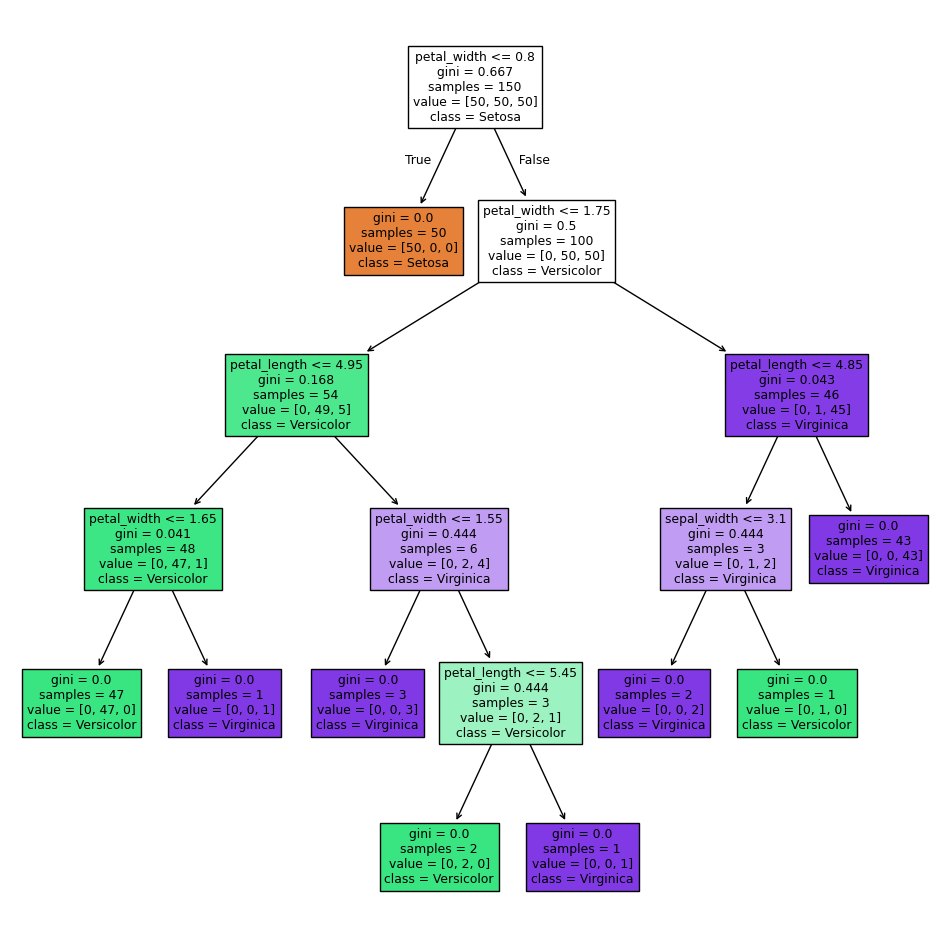

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
from matplotlib import rcParams
rcParams['figure.figsize']=12,12
dt = tree.DecisionTreeClassifier()
dt.fit(X,y)
tree.plot_tree(dt,
               class_names=['Setosa','Versicolor','Virginica'],
               feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
              filled=True,max_depth=6)
plt.show()